# **UAS Aljabar Linear Elementer**

Nama: **Indra Madaharsa** <br>
NIM: **2304130127** <br>
Prodi: **Teknik Informatika, Rombel 3**

Dalam Ujian Akhir ini, kami mengerjakan proyek akhir dengan beberapa soal dan ketentuan berikut:

1. Siapkan 2 foto berwarna mahasiswa. 1 Foto diambil dari sikadu dan 1 foto bebas, sopan dan close up.
2. Ubah 2 foto tersebut ke greyscale dan hitam putih.
3. Ubah 6 foto di atas menjadi matriks.
4. Lakukan proses SVD pada 6 matriks tersebut serta tentukan masing-masing matriks perkaliannya.
5. Implementasikan 6 foto di atas ke dalam PCA, Eigen Value, dan Vector serta SVD.
6. Lakukan Improvisasi dari masing-masing mahasiswa sehingga terjadi perbedaan yang signifikan antara proyek mahasiswa.
7. Berikan komentar, penjelasan dan kesimpulan pada __Google Colab__ atau __Text Editor__ mahasiswa.
8. Jika mahasiswa akan memperbaiki Video UTS, silahkan di upload ulang updatenya dan menghapus file video lama. <br>

Link GD UAS sama dengan link GD UTS. Upload file sesuai dengan Rombel dan kelompok masing-masing. Khusus file UAS, mahasiswa agar membuat folder baru di bawah folder kelompok dengan nama folder berupa **nama-nim mahasiswa**. <br>

Link GD UAS masing-masing mahasiswa yang berisi file UAS agar diupload di elena paling lambat tanggal 12 Juni 2024 pukul 23.59 WIB.

**Pustaka atau _Library_ yang akan digunakan:** 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import utils
import os
from glob import glob
from PIL import Image
from scipy.ndimage import zoom

**_Library_ dan fungsinya**

1. NumPy (np):

Digunakan untuk operasi matematika dan manipulasi array, termasuk mengubah gambar menjadi matriks dan melakukan operasi seperti Singular Value Decomposition (SVD).

2. Glob (glob):

Digunakan untuk mencari file dalam folder berdasarkan pola tertentu (misalnya, mencari semua file dengan ekstensi .jpg dalam folder).
PIL (Pillow) (Image):

Digunakan untuk membuka, memanipulasi, dan menyimpan gambar. Dalam konteks ini, akan digunakan untuk membuka gambar, mengubah warna gambar (misalnya, ke grayscale dan hitam putih), serta menyimpan hasilnya.

3. Matplotlib (plt):

Digunakan untuk menampilkan gambar dan membuat plot yang diperlukan. Dalam konteks ini, akan digunakan untuk menampilkan gambar-gambar yang telah diubah dan hasil analisis seperti SVD dan PCA.

4. Copy (copy):

Digunakan untuk membuat salinan dari objek Python. Mungkin diperlukan untuk membuat salinan dari gambar atau matriks agar tidak mengubah data asli.

5. Utils (utils):

Library ini tidak standar dan tampaknya berisi fungsi-fungsi khusus yang dibuat untuk proyek ini, seperti fungsi untuk membaca gambar dari folder dan mengubahnya menjadi grid persegi.

6. Scipy.ndimage (zoom):

Library ini digunakan untuk membantu saya dalam zooming atau membesarkan gambar saya (dikarenakan saya tidak memiliki foto yang close up).

7. OS (os)

Digunakan untuk mendapatkan file dalam folder, membuat path ke file dengan menggabungkan folder dan nama file, dan memastikan hanya sejumlah file gambar tertentu saja yang di ambil dari folder

### **Soal 1**
Siapkan 2 foto berwarna mahasiswa. 1 Foto diambil dari sikadu dan 1 foto bebas, sopan dan close up.

Pada bagian foto bebas, saya menggunakan _library_ scipy.ndimage untuk membesarkan atau zoom gambar saya dikarenakan saya tidak memenuhi kriteria ke 3 yaitu close up.

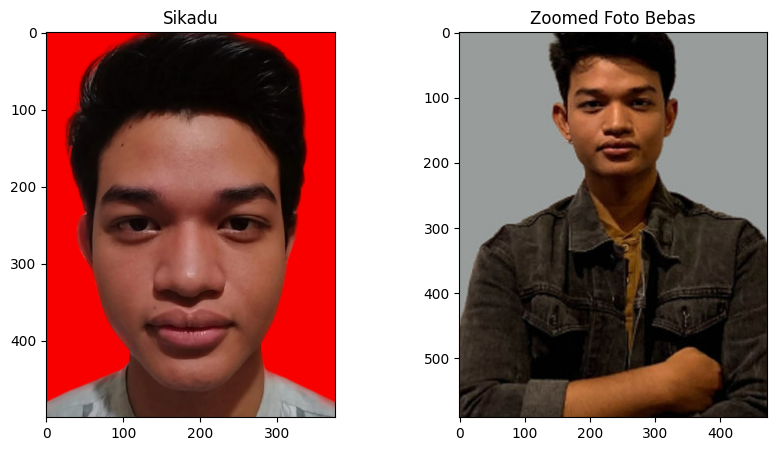

In [23]:
def clipped_zoom(img, zoom_factor, **kwargs):
    h, w = img.shape[:2]
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    if zoom_factor < 1:
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)
    elif zoom_factor > 1:
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]
    else:
        out = img
    return out

# Siapkan foto
sikadu_path = 'instructors/sikadu.jpg'
fotoBebas_path = 'instructors/indra.jpg'

sikadu = Image.open(sikadu_path)
fotoBebas = Image.open(fotoBebas_path)

# Zoom image
fotoBebas_np = np.array(fotoBebas)
zmFotoBebas = clipped_zoom(fotoBebas_np, 1.5)

# Tampilkan hasil zoom
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(sikadu)
ax[0].set_title('Sikadu')

ax[1].imshow(zmFotoBebas)
ax[1].set_title('Zoomed Foto Bebas')

plt.show()

### **Soal 2**
Ubah 2 foto tersebut ke greyscale dan hitam putih.

Penjelasan mengenai function `convert(L)`:

Dalam pemrosesan gambar, mengonversi gambar dari satu mode warna ke mode warna lainnya, bisa berguna untuk berbagai tujuan. Fungsi convert() dalam pustaka gambar seperti Pillow (Python Imaging Library) memungkinkan Anda mengubah mode gambar. Tiga mode yang disebutkan-RGB, CMYK, dan L-adalah model warna yang berbeda, dan masing-masing memiliki tujuan spesifik:

1. **RGB (Red, Green, Blue):**
	* **Deskripsi**: RGB adalah model warna yang digunakan untuk gambar digital. Ini merepresentasikan warna sebagai kombinasi cahaya merah, hijau, dan biru.
	* **Penggunaan**: Mode ini pada umumnya digunakan untuk gambar yang ditampilkan pada layar (misalnya, monitor komputer, televisi, kamera).

2. **CMYK (Cyan, Magenya, Yellow, Black):**
	* **Deskripsi**: CMYK adalah model warna yang digunakan untuk pencetakan warna. Ini merepresentasikan warna sebagai kombinasi tinta cyan, magenta, kuning, dan hitam.
	* **Penggunaan**: Mode ini digunakan untuk menyiapkan gambar untuk dicetak, di mana pencampuran warna bersifat subtraktif (yaitu, warna diciptakan dengan mengurangi cahaya).

3. **L (Luminance or Grayscale):**
	* **Deskripsi**: Mode L adalah model warna skala abu-abu di mana gambar terdiri atas berbagai warna abu-abu. Tiap piksel merepresentasikan kecerahan atau intensitas cahaya.
	* **Penggunaan**: Mode ini digunakan apabila informasi warna tidak diperlukan, misalnya, pada jenis analisis gambar tertentu, kompresi, atau efek artistik.

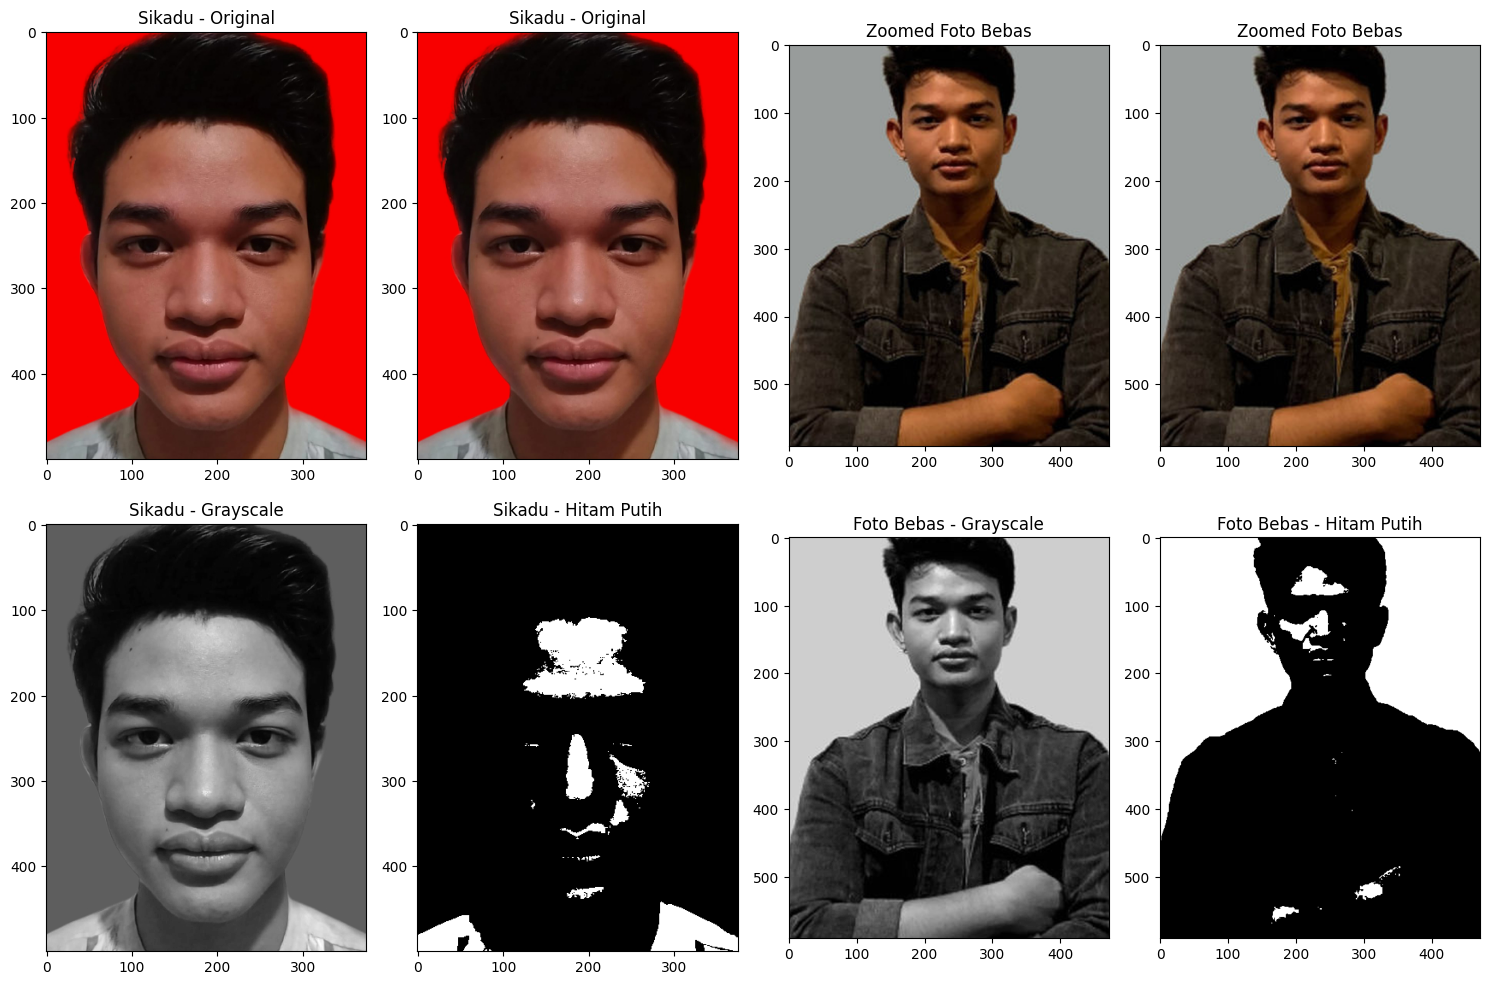

In [19]:
# Zoom foto bebas
zmFotoBebas = clipped_zoom(fotoBebas_np, 1.5)
zmFotoBebas = Image.fromarray(zmFotoBebas)

# Ubah ke grayscale dan hitam putih
sikadu_gray = sikadu.convert('L')
fotoBebas_gray = zmFotoBebas.convert('L')

sikadu_bw = sikadu_gray.point(lambda x: 0 if x < 128 else 255, '1')
fotoBebas_bw = fotoBebas_gray.point(lambda x: 0 if x < 128 else 255, '1')

# Tampilkan hasil
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

ax[0, 0].imshow(sikadu)
ax[0, 0].set_title('Sikadu - Original')
ax[0, 1].imshow(sikadu)
ax[0, 1].set_title('Sikadu - Original')
ax[0, 2].imshow(zmFotoBebas)
ax[0, 2].set_title('Zoomed Foto Bebas')
ax[0, 3].imshow(zmFotoBebas)
ax[0, 3].set_title('Zoomed Foto Bebas')

ax[1, 0].imshow(sikadu_gray, cmap='gray')
ax[1, 0].set_title('Sikadu - Grayscale')
ax[1, 1].imshow(sikadu_bw, cmap='gray')
ax[1, 1].set_title('Sikadu - Hitam Putih')
ax[1, 2].imshow(fotoBebas_gray, cmap='gray')
ax[1, 2].set_title('Foto Bebas - Grayscale')
ax[1, 3].imshow(fotoBebas_bw, cmap='gray')
ax[1, 3].set_title('Foto Bebas - Hitam Putih')

plt.tight_layout()
plt.show()

### **Soal 3**
Ubah 6 foto di atas menjadi matriks.

Disini foto yang di maksud adalah foto yang sudah di sediakan oleh file `Case - Study Face Identification.ipynb` dan gambar-gambar nya diambil dari folder instructors.

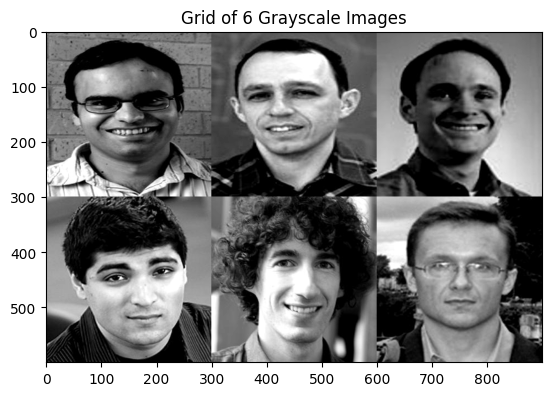

In [28]:
def load_faces(folder, num_images=6):
    images = []
    all_faces = []
    image_files = sorted(os.listdir(folder))[:num_images]
    for file in image_files:
        if file.endswith('.jpg') or file.endswith('.png'):
            img_path = os.path.join(folder, file)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img_np = np.array(img)
            images.append(img)
            all_faces.append(img_np)
    return images, all_faces

def gray_images_square_grid(images):
    num_images = len(images)
    grid_size = int(np.ceil(np.sqrt(num_images)))
    img_shape = images[0].shape
    grid = np.zeros((grid_size * img_shape[0], grid_size * img_shape[1]), dtype=np.uint8)

    for i in range(num_images):
        row = i // grid_size
        col = i % grid_size
        grid[row * img_shape[0]:(row + 1) * img_shape[0], col * img_shape[1]:(col + 1) * img_shape[1]] = images[i]

    return grid[:row * img_shape[0] + img_shape[0], :col * img_shape[1] + img_shape[1]]

# Ensure the instructors folder is in the same directory and has not been moved.
folder_path = 'instructors/'

# Load 6 images
S, all_faces = load_faces(folder_path, num_images=6)

# Create and show the image grid
grid_im = gray_images_square_grid(np.array(all_faces))
plt.imshow(grid_im, cmap='gray')
plt.title("Grid of 6 Grayscale Images")
plt.show()

Disini kita mengambil hasil matrix dari 6 gambar tersebut berdasarkan ukuran file gambar nya, yaitu 300 x 300 menggunakan `.shape` mungkin akan ada pertanyaan, mengapa tidak menggunakan `.nbytes`? dikarenakan jika menggunakan `.nbytes` yang akan di dapatkan hanya ordo 1 x 1 dan tidak 1 x 2.

In [35]:
# Convert the images to matrices
image_matrices = [np.array(img) for img in all_faces]

# Display the shape of each matrix to confirm
for idx, img_matrix in enumerate(image_matrices):
    print(f"Shape of image {idx+1}: {img_matrix.shape}")

Shape of image 1: (300, 300)
Shape of image 2: (300, 300)
Shape of image 3: (300, 300)
Shape of image 4: (300, 300)
Shape of image 5: (300, 300)
Shape of image 6: (300, 300)


### **Soal 4**
Lakukan proses SVD pada 6 matriks tersebut serta tentukan masing-masing matriks perkaliannya.

In [51]:
# Perform SVD on each image matrix and calculate their product
svd_results = []

for idx, img_matrix in enumerate(image_matrices):
    U, S, VT = np.linalg.svd(img_matrix, full_matrices=False)
    S_matrix = np.diag(S)
    reconstructed_matrix = np.dot(U, np.dot(S_matrix, VT))
    svd_results.append((U, S_matrix, VT, reconstructed_matrix))
    print(f"Image {idx+1} - Shapes of U, S, VT, and Reconstructed Matrix:")
    print(f"U: {U.shape}, S: {S_matrix.shape}, VT: {VT.shape}, Reconstructed: {reconstructed_matrix.shape}")

    # Ensure the reconstruction is close to the original
    if np.allclose(img_matrix, reconstructed_matrix):
        print(f"Image {idx+1} successfully reconstructed.\n")
    else:
        print(f"Image {idx+1} reconstruction failed.\n")

# Now svd_results contains the SVD components and reconstructed matrices for each image

Image 1 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (300, 300), S: (300, 300), VT: (300, 300), Reconstructed: (300, 300)
Image 1 successfully reconstructed.

Image 2 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (300, 300), S: (300, 300), VT: (300, 300), Reconstructed: (300, 300)
Image 2 successfully reconstructed.

Image 3 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (300, 300), S: (300, 300), VT: (300, 300), Reconstructed: (300, 300)
Image 3 successfully reconstructed.

Image 4 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (300, 300), S: (300, 300), VT: (300, 300), Reconstructed: (300, 300)
Image 4 successfully reconstructed.

Image 5 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (300, 300), S: (300, 300), VT: (300, 300), Reconstructed: (300, 300)
Image 5 successfully reconstructed.

Image 6 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (300, 300), S: (300, 300), VT: (300, 300), Reconstructed: (300, 300)
Image 6 successfully reconstructed.

